# Comparing datasets 
After a rigorous cleaning effort, two datasets are compared on their quality. 


##Load Data

In [413]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataset 1

In [414]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1B4PXI-UUQIIp5GdTMQVU6-MNOwbYokUk/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# orders_qu.csv
url = "https://drive.google.com/file/d/1vc5qV1dOWOW_o97Qgo1cCa4QZEQy-sEj/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

Dataset 2

In [415]:
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

csv_names = ['products', 'orders', 'orderlines']

# Google Drive file ids


files_id = {
    'products':"1bG8BXm-DqeJojNWivo17IJH3-5dkDsJR",
    'orders':"1WXPTr6odN4SXWd0tnC7f_s_R_Jq5sArI",
    'orders_fl':"1UsmBWO8AltKXurJQw0zWEkYY78CMcIeB",
    'orderlines':"1Pho6zy-lNL0rZSv127inVwNcoGIzvnC4",
    'orderlines_fl':"1uj822JkUJciKCNojj_EIAH_7yn2gLb4n",
 
} 

# Read data from Google Drive
products_me = pd.read_csv(gd_path(files_id['products']), sep=",")
orders_me_cl = pd.read_csv(gd_path(files_id['orders']), sep=",")
orders_fl = pd.read_csv(gd_path(files_id['orders_fl']), sep=",")
orderlines_me_cl = pd.read_csv(gd_path(files_id['orderlines']), sep=",")
orderlines_fl = pd.read_csv(gd_path(files_id['orderlines_fl']), sep=",")

## Orders

###Filtered

In [416]:
orders_fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46162 entries, 0 to 46161
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      46162 non-null  int64  
 1   created_date  46162 non-null  object 
 2   total_paid    46162 non-null  float64
 3   state         46162 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ MB


In [417]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [472]:
orders_fl.sample(5)

,order_id,created_date,total_paid,state
13650,374958,2017-07-09 22:57:25,23.96,Completed
17635,392107,2017-08-24 17:57:05,46.98,Completed
27728,439185,2017-11-24 13:50:08,66.03,Completed
19084,399389,2017-09-12 23:52:28,27.98,Completed
21323,410530,2017-10-09 16:28:52,68.73,Completed


In [473]:
orders_qu.sample(5)

,order_id,created_date,total_paid,state
10795,367759,2017-06-21 11:43:14,432.96,Completed
4316,317005,2017-01-30 00:00:14,51.98,Completed
32679,479664,2018-01-02 15:39:21,15.97,Completed
10901,368559,2017-06-24 08:35:16,121.98,Completed
39708,519414,2018-03-01 13:47:12,352.17,Completed


In [420]:
orders_qu.total_paid.describe()

count    40985.000000
mean       194.673066
std        250.508266
min          2.820000
25%         46.980000
50%         98.040000
75%        244.990000
max       6876.940000
Name: total_paid, dtype: float64

In [421]:
orders_fl.total_paid.describe()

count    46162.000000
mean       337.016115
std        616.975802
min          0.000000
25%         50.870000
50%        112.730000
75%        329.920000
max      13387.780000
Name: total_paid, dtype: float64

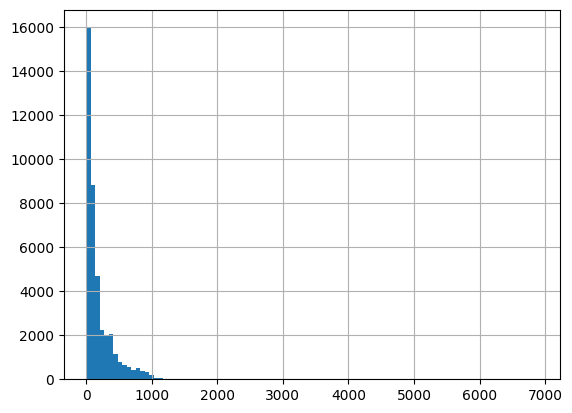

In [422]:
orders_qu.total_paid.hist(bins=100);

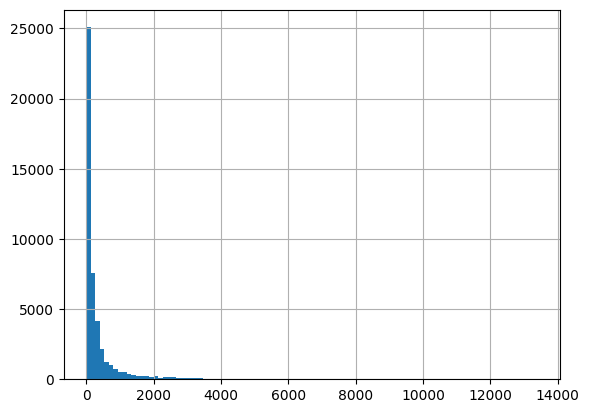

In [423]:
orders_fl.total_paid.hist(bins=100);

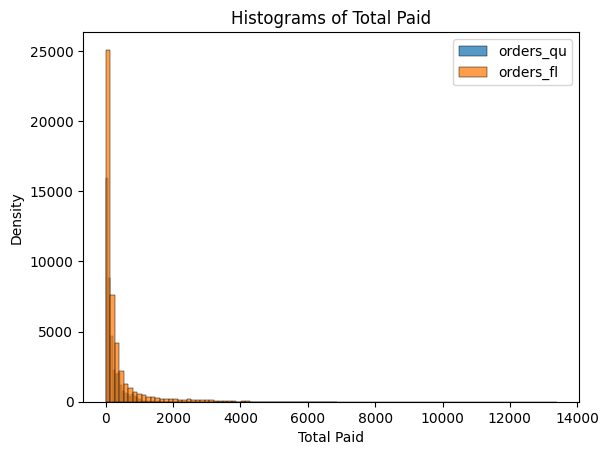

In [424]:
# Plotting the histograms
sns.histplot(orders_qu.total_paid, bins=100, label='orders_qu')
sns.histplot(orders_fl.total_paid, bins=100, label='orders_fl')

# Adding labels and title
plt.xlabel('Total Paid')
plt.ylabel('Density')
plt.title('Histograms of Total Paid')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

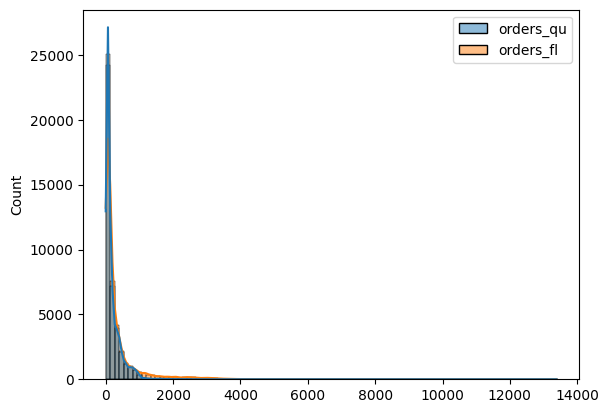

In [425]:
# Combine the data into a single DataFrame
combined_data = pd.concat([orders_qu.total_paid, orders_fl.total_paid], axis=1, keys=['orders_qu', 'orders_fl'])

# Plotting the histograms
sns.histplot(data=combined_data, bins=100, kde=True);

###Unfiltered

In [426]:
orders_me_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [427]:
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [474]:
orders_me_cl.sample(5)

,order_id,created_date,total_paid,state
695,300068,2017-01-01 22:44:09,65.55,Shopping Basket
107115,406700,2017-09-30 16:25:00,319.99,Completed
79189,378737,2017-07-17 20:59:41,54.00,Place Order
123921,423515,2017-11-08 17:29:29,194.99,Shopping Basket
127433,427046,2017-11-15 09:41:14,521.79,Shopping Basket


In [475]:
orders_cl.sample(5)

,order_id,created_date,total_paid,state
167486,467815,2017-12-20 12:38:44,291.99,Shopping Basket
180053,480455,2018-01-03 00:36:44,0.00,Shopping Basket
27194,326674,2017-02-20 13:14:50,17.39,Shopping Basket
124458,424055,2017-11-10 03:16:05,0.00,Place Order
160099,460344,2017-12-11 22:31:03,19.99,Shopping Basket


In [430]:
orders_cl.total_paid.describe()

count    226904.000000
mean        569.225818
std        1761.778002
min           0.000000
25%          34.190000
50%         112.990000
75%         525.980000
max      214747.530000
Name: total_paid, dtype: float64

In [431]:
orders_me_cl.total_paid.describe()

count    226904.000000
mean        569.225818
std        1761.778002
min           0.000000
25%          34.190000
50%         112.990000
75%         525.980000
max      214747.530000
Name: total_paid, dtype: float64

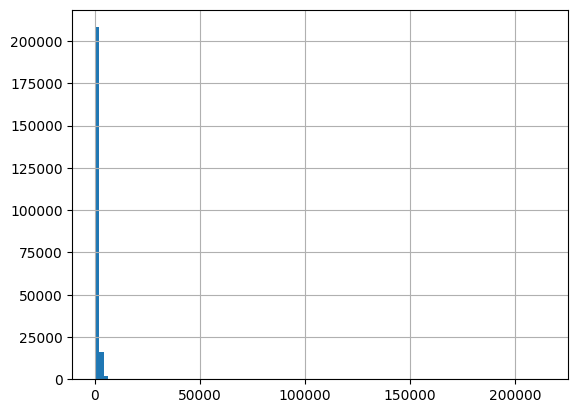

In [432]:
orders_cl.total_paid.hist(bins=100);

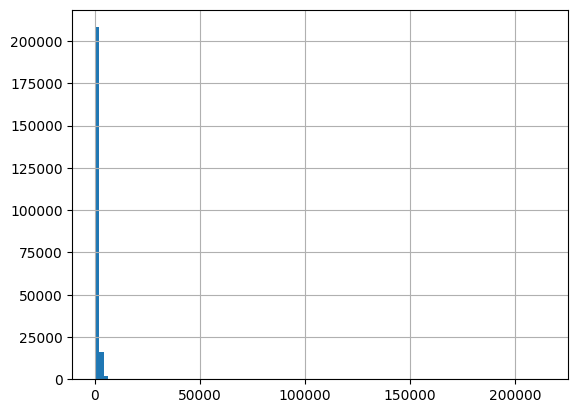

In [433]:
orders_me_cl.total_paid.hist(bins=100);

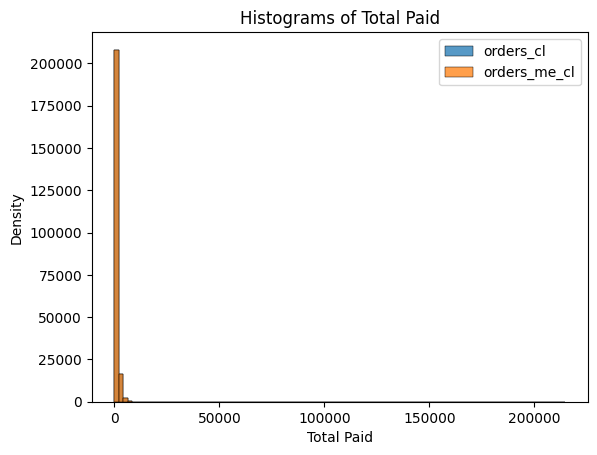

In [434]:
# Plotting the histograms
sns.histplot(orders_cl.total_paid, bins=100, label='orders_cl')
sns.histplot(orders_me_cl.total_paid, bins=100, label='orders_me_cl')

# Adding labels and title
plt.xlabel('Total Paid')
plt.ylabel('Density')
plt.title('Histograms of Total Paid')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

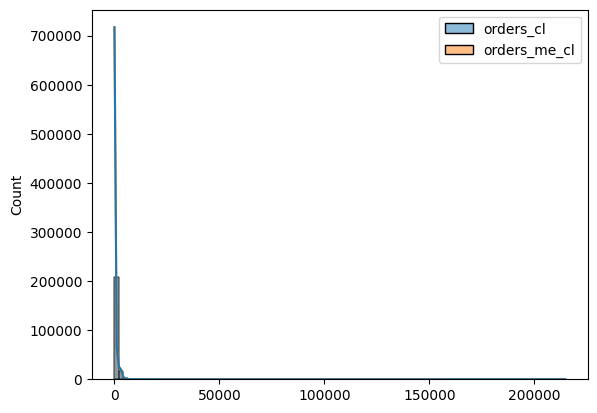

In [435]:
# Combine the data into a single DataFrame
combined_data = pd.concat([orders_cl.total_paid, orders_me_cl.total_paid], axis=1, keys=['orders_cl', 'orders_me_cl'])

# Plotting the histograms
sns.histplot(data=combined_data, bins=100, kde=True);

### Status 
Take the `orders` as it is. No significant differences 

## Orderlines

### Unfiltered

In [476]:
orderlines_me_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289669 entries, 0 to 289668
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_order          289669 non-null  int64  
 1   id                289669 non-null  int64  
 2   product_id        289669 non-null  int64  
 3   product_quantity  289669 non-null  int64  
 4   sku               289669 non-null  object 
 5   date              289669 non-null  object 
 6   cl_unit_price     289668 non-null  float64
 7   sum_price         289668 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.7+ MB


In [477]:
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                216250 non-null  int64  
 1   id_order          216250 non-null  int64  
 2   product_id        216250 non-null  int64  
 3   product_quantity  216250 non-null  int64  
 4   sku               216250 non-null  object 
 5   unit_price        216250 non-null  float64
 6   date              216250 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.5+ MB


In [478]:
orderlines_me_cl.sample()

,id_order,id,product_id,product_quantity,sku,date,cl_unit_price,sum_price
114554,400794,1354469,0,1,WDT0358,2017-09-17 21:44:01,97.79,97.79


In [479]:
orderlines_cl.sample()

,id,id_order,product_id,product_quantity,sku,unit_price,date
82037,1298917,380414,0,1,LAC0092,173.99,2017-07-21 14:12:49


In [480]:
orderlines_me_cl[orderlines_me_cl.cl_unit_price <1000].cl_unit_price.describe() #Filter the outliers 

count    254075.000000
mean        158.742654
std         207.685715
min           0.000000
25%          29.990000
50%          74.990000
75%         176.890000
max         999.990000
Name: cl_unit_price, dtype: float64

In [481]:
orderlines_cl.unit_price.describe()

count    216250.000000
mean        164.636160
std         219.630604
min        -119.000000
25%          29.740000
50%          69.990000
75%         184.580000
max         999.990000
Name: unit_price, dtype: float64

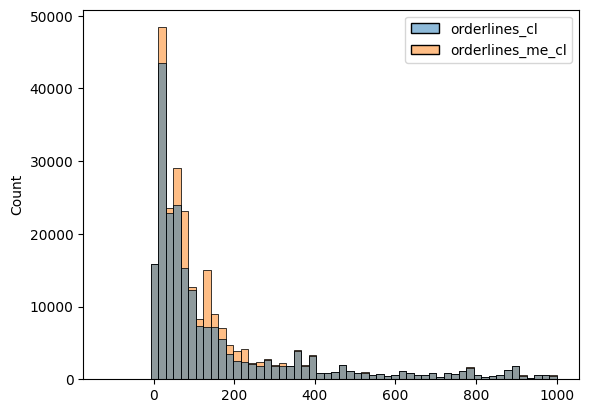

In [482]:
# Combine the data into a single DataFrame
combined_data = pd.concat([orderlines_cl.unit_price, (orderlines_me_cl[orderlines_me_cl.cl_unit_price <1000].cl_unit_price)], axis=1, keys=['orderlines_cl', 'orderlines_me_cl']) #Filter the outliers 

# Plotting the histograms
sns.histplot(data=combined_data, bins=60);

<Axes: >

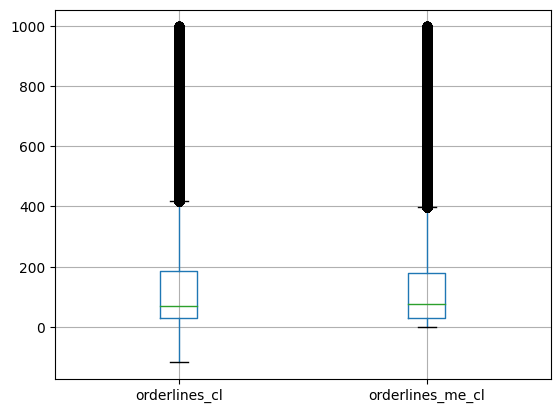

In [483]:
combined_data.boxplot(['orderlines_cl','orderlines_me_cl'])

### Filtered

In [445]:
orderlines_fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61269 entries, 0 to 61268
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          61269 non-null  int64  
 1   id                61269 non-null  int64  
 2   product_id        61269 non-null  int64  
 3   product_quantity  61269 non-null  int64  
 4   sku               61269 non-null  object 
 5   date              61269 non-null  object 
 6   cl_unit_price     61269 non-null  float64
 7   sum_price         61269 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.7+ MB


In [446]:
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ MB


In [449]:
orders_qu.merge(orderlines_qu, how="right", left_on="order_id", right_on="id_order" )

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date
0,299545,2017-01-01 01:51:47,51.48,Completed,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,299546,2017-01-01 01:57:34,18.99,Completed,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,295347,2017-01-01 02:02:38,72.19,Completed,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,299556,2017-01-01 02:30:08,65.89,Completed,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,299561,2017-01-01 02:39:47,154.48,Completed,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...,...,...,...,...
53226,527035,2018-03-14 11:44:34,37.98,Completed,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41
53227,527070,2018-03-14 11:50:48,24.97,Completed,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
53228,527074,2018-03-14 11:51:42,24.97,Completed,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
53229,527096,2018-03-14 11:58:40,34.96,Completed,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [450]:
orderlines_fl.sample()

,id_order,id,product_id,product_quantity,sku,date,cl_unit_price,sum_price
60252,522298,1638119,0,1,AP20279,2018-03-06 17:03:20,39.0,39.0


In [451]:
orderlines_qu.sample()

,id,id_order,product_id,product_quantity,sku,unit_price,date
3552,1150440,311278,0,1,GTE0035,426.99,2017-01-17 23:02:46


In [452]:
orderlines_fl[orderlines_fl.cl_unit_price < 1000].cl_unit_price.describe()

count    57801.000000
mean       134.687855
std        179.544881
min          0.010000
25%         26.990000
50%         64.990000
75%        154.000000
max        999.990000
Name: cl_unit_price, dtype: float64

In [453]:
orderlines_qu.unit_price.describe()

count    53231.000000
mean       135.484903
std        180.719645
min          1.990000
25%         26.990000
50%         64.990000
75%        154.000000
max        999.990000
Name: unit_price, dtype: float64

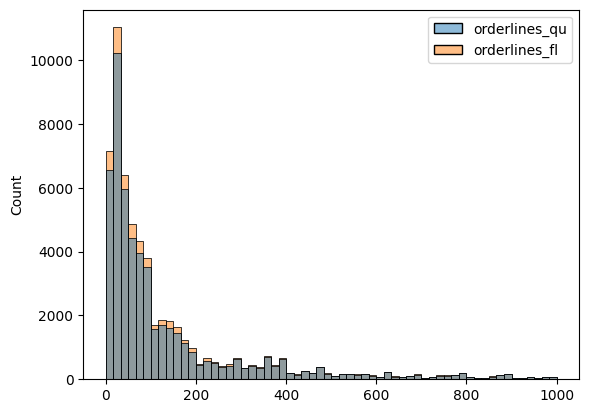

In [454]:
# Combine the data into a single DataFrame
combined_data_fl = pd.concat([orderlines_qu.unit_price, (orderlines_fl[orderlines_fl.cl_unit_price < 1000].cl_unit_price)], axis=1, keys=['orderlines_qu', 'orderlines_fl']) #Filter the outliers 

# Plotting the histograms
sns.histplot(data=combined_data_fl, bins=60);

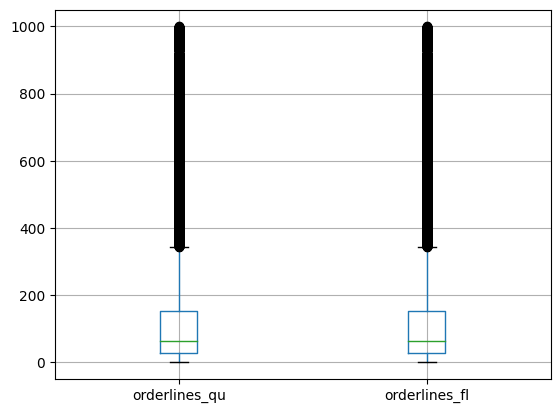

In [455]:
combined_data_fl.boxplot(['orderlines_qu','orderlines_fl']);

### Status

`orderlines_fl` looks ok, few outliers  

## Products 

In [457]:
products_me.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10267 entries, 0 to 10266
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       10267 non-null  object 
 1   long      10267 non-null  object 
 2   name      10267 non-null  object 
 3   desc      10267 non-null  object 
 4   cl_price  10267 non-null  float64
 5   type      10267 non-null  object 
dtypes: float64(1), object(5)
memory usage: 481.4+ KB


In [458]:
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


In [460]:
products_me.sample()

,sku,long,name,desc,cl_price,type
6398,REP0430,Repair,iPad Speaker lower repair,Repair service including parts and labor for iPad,69.99003,"1,44E+11"


In [461]:
products_cl.sample()

,sku,name,desc,price,in_stock,type
3740,TUC0253,"Tucano Nido Hard-Shell Case MacBook Air 13 ""Tr...",rigid and slicked with rubber feet for Macbook...,29.9,0,13835403


In [465]:
products_me[products_me.cl_price >1].cl_price.describe()

count    10267.000000
mean       655.506851
std       1347.894010
min          2.990000
25%         44.990000
50%        111.990000
75%        631.490000
max      15339.000000
Name: cl_price, dtype: float64

In [467]:
products_cl.price.describe()

count     9992.000000
mean       667.346268
std       1365.540546
min          2.990000
25%         42.990000
50%        112.990000
75%        660.695000
max      15339.000000
Name: price, dtype: float64

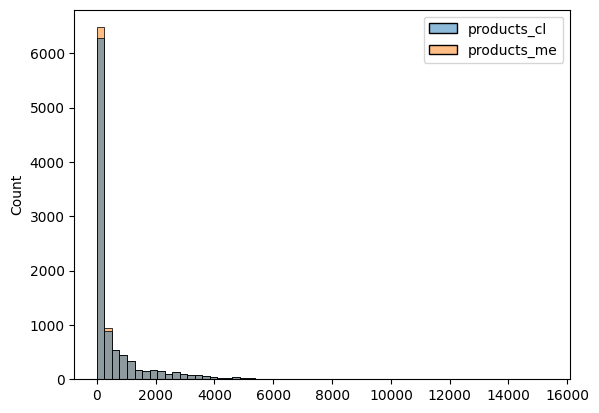

In [469]:
# Combine the data into a single DataFrame
combined_data_fl = pd.concat([products_cl.price, (products_me[products_me.cl_price > 1].cl_price)], axis=1, keys=['products_cl', 'products_me'])

# Plotting the histograms
sns.histplot(data=combined_data_fl, bins=60);

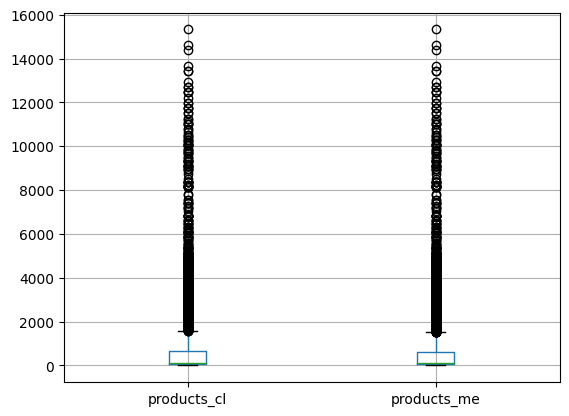

In [470]:
combined_data_fl.boxplot(['products_cl','products_me']);

### Status 

All good! Keep my cleaned dataset. 